### Monte Carlo Simulations for Probability of Default
Monte Carlo simulations can be employed to simulate default probabilities for individual loans and assess the overall credit risk of a portfolio. This involves generating random scenarios of credit events, which helps in estimating the likelihood of defaults under various conditions. By analyzing the distribution of default probabilities across these scenarios, banks can better understand the potential risks associated with different portfolio configurations1.

### Monte Carlo Simulations for Loss Given Default
Similarly, Monte Carlo simulations are used to model LGD by considering various uncertain factors such as recovery rates and economic conditions. The simulation involves constructing probability distributions for these variables and generating numerous scenarios to evaluate potential losses in case of default. This approach allows for a more comprehensive assessment of the risk profile by accounting for the variability and uncertainty inherent in recovery rates12.

### PD/LGD Correlation
Monte Carlo simulations also facilitate the analysis of correlations between PD and LGD. Such correlations are crucial because they can significantly impact the estimation of expected losses. Ignoring these correlations might lead to an underestimation of credit risk. By incorporating PD/LGD linkage into models like CreditRisk+, simulations can provide a more accurate representation of potential losses by considering both systematic and idiosyncratic risks23.
Overall, Monte Carlo simulations offer a robust framework for estimating credit risk metrics by allowing financial institutions to explore a wide range of possible outcomes and better prepare for adverse scenarios.

## Probability of Deafult in Python 
- This simulation uses a binomial distribution to model loan defaults and calculates the observed PD.

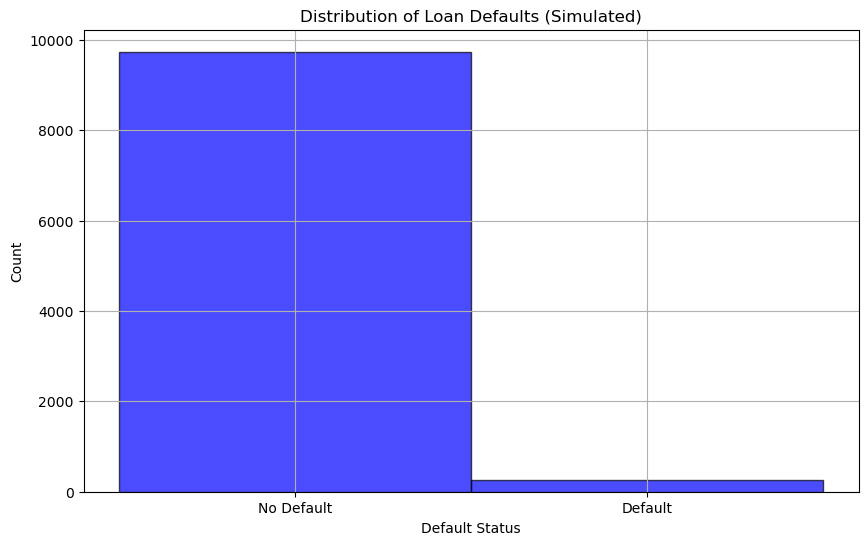

Observed Probability of Default: 0.0264


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for simulating defaults
np.random.seed(42)
num_loans = 10000 
mean_default_rate = 0.03  # Estimated mean probability of default

# Simulate default events using a binomial distribution
defaults = np.random.binomial(1, mean_default_rate, num_loans)

# Create a DataFrame with results
loan_data = pd.DataFrame({'Loan_ID': np.arange(1, num_loans + 1),
                           'Default': defaults})

# Calculate Probability of Default
observed_pd = loan_data['Default'].mean()

# Plotting the distribution of defaults
plt.figure(figsize=(10, 6))
plt.hist(loan_data['Default'], bins=[-0.5, 0.5, 1.5], alpha=0.7, color='blue', edgecolor='black')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Defaults (Simulated)')
plt.grid()
plt.show()

print(f"Observed Probability of Default: {observed_pd}")

### This example models LGD by simulating recovery rates with a normal distribution and calculating LGD as 
    1 − Recovery Rate

These simulations provide insights into the distribution and variability of PD and LGD under different scenarios.

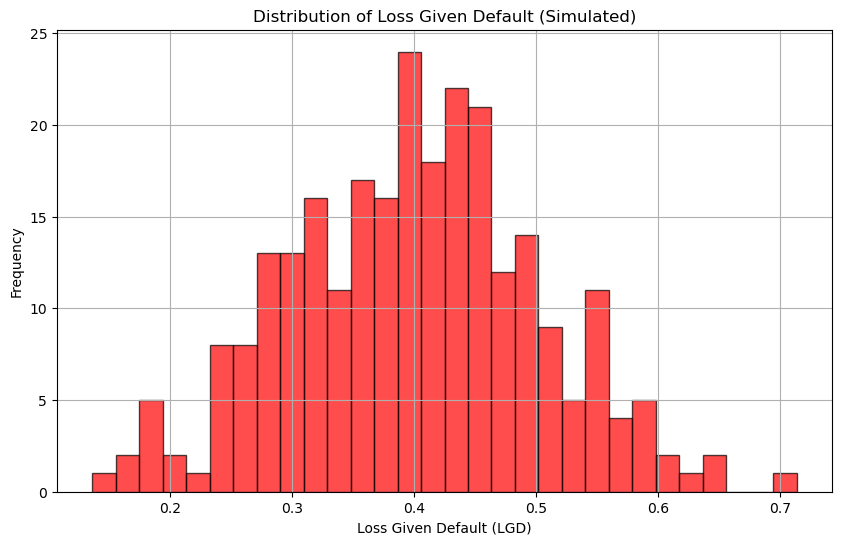

Mean LGD: 0.4002275271760605, Standard Deviation of LGD: 0.10109905565868804


In [2]:
# Parameters for simulating recovery rates
num_defaults = int(num_loans * observed_pd)
mean_recovery_rate = 0.6
recovery_rates = np.random.normal(loc=mean_recovery_rate, scale=0.1, size=num_defaults)
recovery_rates[recovery_rates < 0] = 0  # Ensure recovery rates are non-negative

# Simulating Loss Given Default (LGD)
# LGD is calculated as (1 - Recovery Rate)
lgd = 1 - recovery_rates

# Summary Statistics
mean_lgd = np.mean(lgd)
std_lgd = np.std(lgd)

# Plotting the distribution of LGD
plt.figure(figsize=(10, 6))
plt.hist(lgd, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Loss Given Default (LGD)')
plt.ylabel('Frequency')
plt.title('Distribution of Loss Given Default (Simulated)')
plt.grid()
plt.show()

print(f"Mean LGD: {mean_lgd}, Standard Deviation of LGD: {std_lgd}")